# Implementation of linear regression using Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

## Loading Data
Dataset cols: hours_studied, test_score

In [2]:
points = np.genfromtxt('data/students_grade.csv', delimiter=',')
points[:10]

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989]])

## Hyperparameters

In [3]:
# Rate of learning of the algorithm. If too low, will converge too slowly. If too high, will never converge
learning_rate = 0.0001

# Model function := y = mx + b
initial_b = 0
initial_m = 0
num_iterations = 1000

## Computes model (m and b) error using "Sum of Squared Errors" method
Refered later as $E(m, b)$

In [4]:
def get_error(m, b, points):
    squaredErrorSum = 0.0
    for x, y in points:
        prediction = m * x + b
        squaredErrorSum += (y - prediction) ** 2
    return squaredErrorSum / len(points)

## Gradient descent

m_gradient = $\frac{\partial E}{\partial m}(m)$

b_gradient = $\frac{\partial E}{\partial b}(b)$

Returns the updated b and m by adding the inverse of it's respective gradient weakened by the $learning\_rate$

In [5]:
def step_gradient(m_current, b_current, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    
    n = len(points)
    for x, y in points:
        b_gradient += 2/n * -(y - (m_current * x - b_current))
        m_gradient += 2/n * -(x * (y - (m_current * x + b_current)))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return (new_m, new_b)

## Main Iteration Loop

Runs the step_gradient $num\_iterations$ times

In [6]:
def gradient_descent_runner(points, inital_m, initial_b, learning_rate, num_iterations):
    b = initial_b
    m = initial_m
    
    for i in range(num_iterations):
        m, b = step_gradient(m, b, points, learning_rate)
    return [m, b]

In [7]:
m, b = gradient_descent_runner(points, initial_m, initial_b, learning_rate, num_iterations)
[m, b]

[1.4771976436010505, 0.11683220683375548]

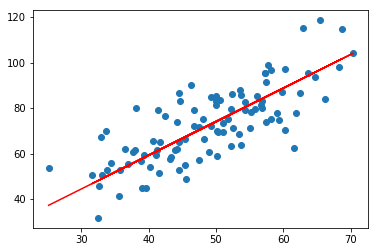

In [8]:
x_arr = [x for x, y in points]
y_arr = [y for x, y in points]
plt.scatter(x_arr, y_arr)
plt.plot(x_arr, [m*x + b for x in x_arr], color='red')

## Comparing with ScikitLearn's implementation

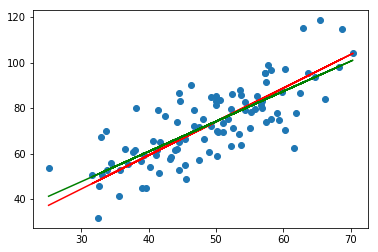

In [9]:
model = linear_model.LinearRegression()
model.fit([[x] for x in x_arr], [[y] for y in y_arr])

plt.scatter(x_arr, y_arr)
plt.plot(x_arr, [m*x + b for x in x_arr], color='red')
plt.plot(x_arr, model.predict([[x] for x in x_arr]), color='green')

plt.show()
